# Weather data time series analysis

# import libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA 

# Loading and viewing data

In [29]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\my_python\weather.csv")
df.head()

,Unnamed: 0,date,temperature_2m
0,0,2000-01-01 00:00:00+00:00,11.5485
1,1,2000-01-01 01:00:00+00:00,11.2485
2,2,2000-01-01 02:00:00+00:00,11.1985
3,3,2000-01-01 03:00:00+00:00,15.2985
4,4,2000-01-01 04:00:00+00:00,19.5485


# set date as index

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 0 to 87671
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      87672 non-null  int64  
 1   date            87672 non-null  object 
 2   temperature_2m  87672 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.0+ MB


In [31]:
#checking the null values in single row
print(df[df['date'].isna()])

Empty DataFrame
Columns: [Unnamed: 0, date, temperature_2m]
Index: []


In [32]:
#convert object into data datype 
df['date']=pd.to_datetime(df['date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87672 entries, 0 to 87671
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      87672 non-null  int64              
 1   date            87672 non-null  datetime64[ns, UTC]
 2   temperature_2m  87672 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1)
memory usage: 2.0 MB


In [33]:
#setting index
df.set_index("date",inplace=True)
df.head()

,Unnamed: 0,temperature_2m
date,,
2000-01-01 00:00:00+00:00,0,11.5485
2000-01-01 01:00:00+00:00,1,11.2485
2000-01-01 02:00:00+00:00,2,11.1985
2000-01-01 03:00:00+00:00,3,15.2985
2000-01-01 04:00:00+00:00,4,19.5485


In [56]:
df = df.loc[:]
df.tail()

,temperature_2m
date,
2009-12-31 19:00:00+00:00,11.8985
2009-12-31 20:00:00+00:00,11.3485
2009-12-31 21:00:00+00:00,10.8485
2009-12-31 22:00:00+00:00,10.4485
2009-12-31 23:00:00+00:00,9.9985


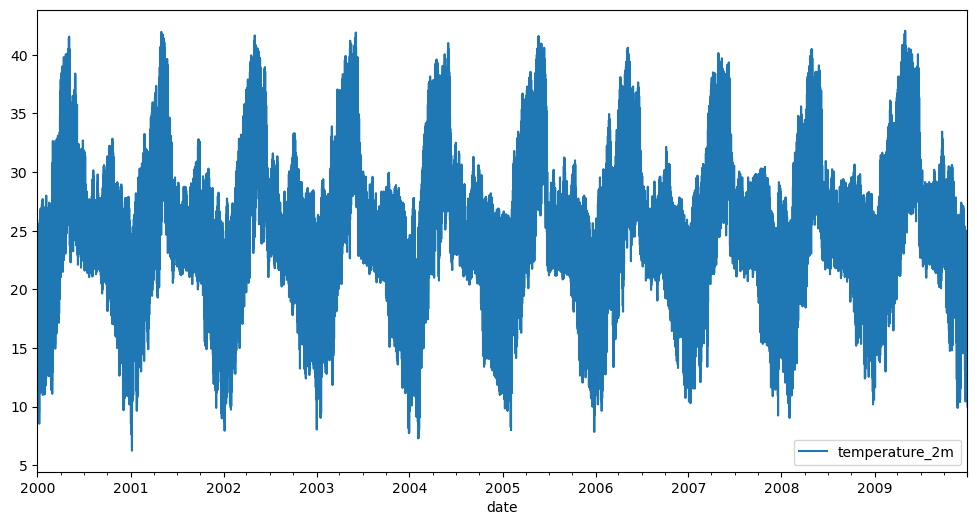

In [54]:
df.plot(figsize=(12,6),subplots =True)
plt.show()

Conclusion : 
* the temperature clearly follows the seasonal pattern
* The temperature decreases at the beginning of the year and reaches very high levels in the middle of the year
* this pattern which shows the temperature variation

# Statinary

In [37]:
adf_r=adfuller(df['temperature_2m'])
print(adf_r)

(-6.199808118667328, 5.844477645445746e-08, 66, 87605, {'1%': -3.4304246474701263, '5%': -2.8615729929608564, '10%': -2.566787561007527}, 107378.79002090017)


In [38]:
if adf_r[1]< 0.05 : # p-values always at the index of [1]
    print("Stationary")
else :
    print("Non Stationary ")#not fit for arima 

Stationary


decompositon -used to find the trends

In [42]:
decom=seasonal_decompose(df['temperature_2m'],model='additive',period=365)
print(decom)

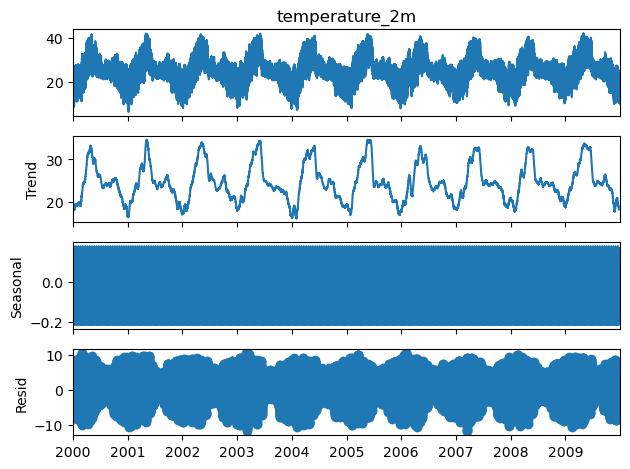

In [41]:
decom.plot()
plt.show()

1. Original Time Series (First Plot - "temperature_2m"):
   * The raw data exhibits a clear seasonal pattern, with temperature rising and fallingcyclically.
   * The periodic peaks and troughs suggest strong seasonality in temperature variations .
2. Trend Component (Second Plot - "Trend"):
   * the trend which follows the cyclic pattern
   * The temperature decreases at the beginning of the year and reaches very high levels in the middle of the year
3. Seasonal Component (Third Plot - "Seasonal"):
   * The seasonal pattern is strong and consistent shows the high temperature across all years, confirming a yearlytemperature cycle.
   * The values oscillate between positive and negative, indicating high and low temperature phases within a year

# ARIMA

In [43]:
len(df)

87672

In [44]:
print(len(df)*0.8)

70137.6


In [45]:
train=df.iloc[0:70137]
test=df.iloc[70137:]

In [46]:
mymodel=ARIMA(train['temperature_2m'],order = (1,1,1))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [47]:
mymodel=mymodel.fit()

In [48]:
forecast = mymodel.forecast(steps=len(test))
print(forecast.head())

2008-01-01 09:00:00+00:00    26.555654
2008-01-01 10:00:00+00:00    26.866717
2008-01-01 11:00:00+00:00    27.078377
2008-01-01 12:00:00+00:00    27.222397
2008-01-01 13:00:00+00:00    27.320394
Freq: H, Name: predicted_mean, dtype: float64


In [49]:
test['forecast']=forecast
test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_6464\2406814425.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast']=forecast


,temperature_2m,forecast
date,,
2008-01-01 09:00:00+00:00,26.2985,26.555654
2008-01-01 10:00:00+00:00,26.1485,26.866717
2008-01-01 11:00:00+00:00,25.4485,27.078377
2008-01-01 12:00:00+00:00,24.1485,27.222397
2008-01-01 13:00:00+00:00,22.6485,27.320394


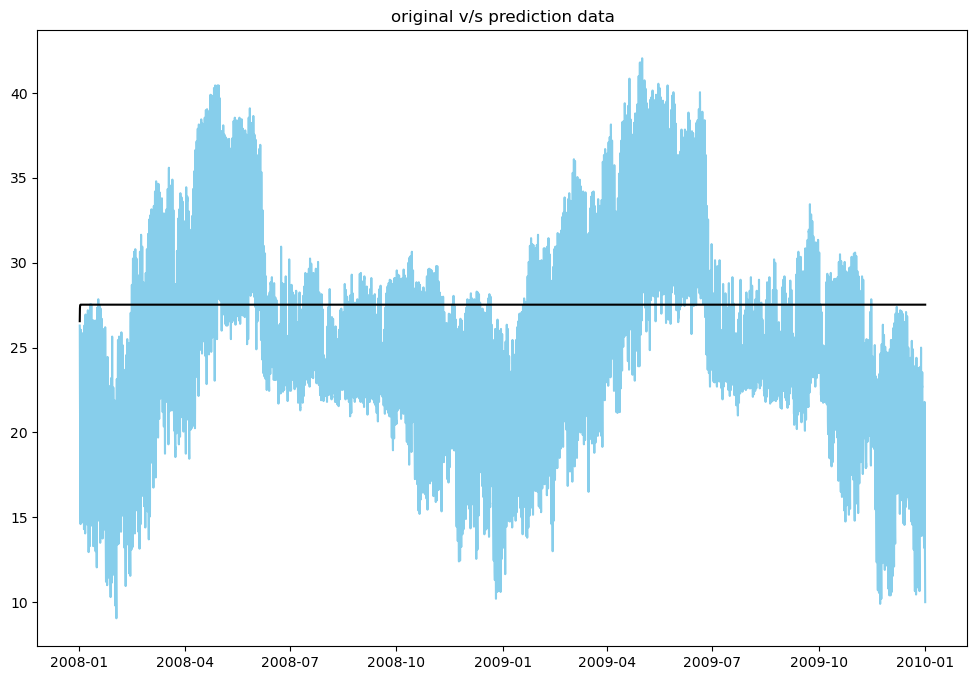

In [51]:
plt.figure(figsize = (12,8))
plt.plot(test.index,test['temperature_2m'],color='skyblue',label="original")
plt.plot(test.index,test['forecast'],color='k',label="original")
plt.title("original v/s prediction data")
plt.show()